# Titanic Case Study

### Importing and Merging Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
survivalData = pd.read_csv("gender_submission.csv")

In [3]:
testData = pd.read_csv("test.csv")
trainData = pd.read_csv("train.csv")
testData = pd.merge(testData,survivalData,how= 'inner', on= 'PassengerId')

In [4]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


### Let's understand the structure of our dataframe

In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Exploratory Data Analysis 

In [7]:
survivalData = trainData.groupby('Survived')['PassengerId'].nunique()

In [8]:
didntSurvive = survivalData[0]
survived= [survivalData[1]]

survivalPercentage = (survived / (survived + didntSurvive)) * 100

In [9]:
survivalPercentage

array([38.38383838])

#### training data is decently balanced

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

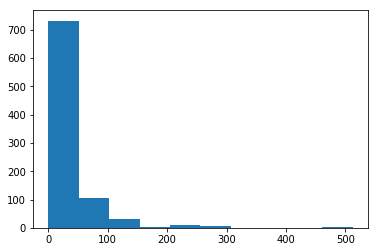

In [10]:
plt.hist(trainData['Fare'])
plt.plot

In [11]:
# Checking for outliers in the continuous variable Fare
num_trainData = trainData[['Fare']]

In [12]:
num_trainData.describe(percentiles=[.25,.5,.75,.90,.95,.99]) 

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
90%,77.958300
95%,112.079150
99%,249.006220


#### We notice that fare is very left skewed and has outliers but we will leave it as it is and might remove the outliers later.

C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

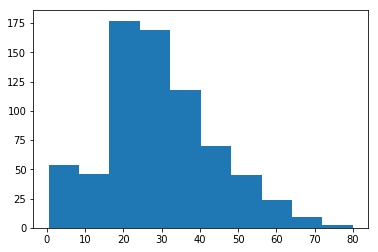

In [13]:
plt.hist(trainData['Age'])
plt.plot

In [14]:
train_Embarked = trainData.groupby('Embarked')['PassengerId'].nunique()
test_Embarked = testData.groupby('Embarked')['PassengerId'].nunique()

In [15]:
train_Embarked

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [16]:
test_Embarked

Embarked
C    102
Q     46
S    270
Name: PassengerId, dtype: int64

### Data Preparation

In [17]:
testData.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [18]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


#### Dropping unnecessary columns  ( Cabin , PassengerId, Name , Ticket )

In [19]:
trainData.drop(columns= 'Cabin' , inplace= True)
testData.drop(columns= 'Cabin' , inplace= True)
trainData.drop(columns= 'PassengerId' , inplace= True)
testData.drop(columns= 'PassengerId' , inplace= True)
trainData.drop(columns= 'Name' , inplace= True)
testData.drop(columns= 'Name' , inplace= True)
trainData.drop(columns= 'Ticket' , inplace= True)
testData.drop(columns= 'Ticket' , inplace= True)


testData

In [20]:
testData.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Survived     0
dtype: int64

#### there are 86 rows in column in Age which has value as NAN .

In [21]:
( 86 / 418 ) * 100 

20.574162679425836

#### We wouldnt want to drop 20 percent of the data in Test set so we would rather impute it with median

In [22]:
testData['Age'].fillna((testData['Age'].median()), inplace=True)

In [23]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 29.4+ KB


In [24]:
(1/418)*100

0.23923444976076555

#### There is 1 Nan value in the column Fare which is simple 0.239 percent of the data so we will simple drop it.

In [25]:
testData.dropna(axis=0 , inplace= True)

In [26]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
Pclass      417 non-null int64
Sex         417 non-null object
Age         417 non-null float64
SibSp       417 non-null int64
Parch       417 non-null int64
Fare        417 non-null float64
Embarked    417 non-null object
Survived    417 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB


In [27]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [28]:
trainData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [29]:
trainData['Age'].fillna((trainData['Age'].median()), inplace=True)

In [30]:
trainData.dropna(axis=0 , inplace= True)

In [31]:
trainData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [33]:
# Converting male to 1 and female to 0
trainData['Sex'] = trainData['Sex'].map({'male':1,'female':0})
testData['Sex'] = testData['Sex'].map({'male':1,'female':0})

In [34]:
# Creating a dummy variable for the variable 'Embarked' and dropping the first one.
embTrain = pd.get_dummies(trainData['Embarked'],prefix='Embarked',drop_first=True)
#Adding the results to the Training dataframe
trainData = pd.concat([trainData,embTrain],axis=1)

embTest = pd.get_dummies(testData['Embarked'],prefix='Embarked',drop_first=True)
#Adding the results to the Training dataframe
testData = pd.concat([testData,embTest],axis=1)

#### Dropping the repeated variable

In [35]:
trainData = trainData.drop('Embarked',1)

In [36]:
testData = testData.drop('Embarked',1)

In [37]:
trainData.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.315152,0.524184,0.382452,32.096681,0.086614,0.724409
std,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504,0.281427,0.447063
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


### Feature Standarization

In [38]:
# Standarizing continuous features

df = trainData[['Pclass','Age','SibSp','Parch','Fare']]
standardized_df=(df-df.mean())/df.std()
trainData = trainData.drop(['Pclass','Age','SibSp','Parch','Fare'], 1)
trainData = pd.concat([trainData,standardized_df],axis=1)

df = testData[['Pclass','Age','SibSp','Parch','Fare']]
standardized_df=(df-df.mean())/df.std()
testData = testData.drop(['Pclass','Age','SibSp','Parch','Fare'], 1)
testData = pd.concat([testData,standardized_df],axis=1)


In [39]:
testData.head()

,Sex,Survived,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,0,0.87428,0.393944,-0.499618,-0.400323,-0.497213
1,0,1,0,1,0.87428,1.383787,0.614503,-0.400323,-0.512045
2,1,0,1,0,-0.31326,2.571599,-0.499618,-0.400323,-0.463974
3,1,0,0,1,0.87428,-0.199963,-0.499618,-0.400323,-0.482308
4,0,1,0,1,0.87428,-0.595900,0.614503,0.617572,-0.417469


### Model Building


In [40]:
X_train = trainData.drop('Survived',1)
survivedColumn = trainData['Survived']
y_train = survivedColumn.to_frame()

X_test = testData.drop('Survived',1)
survivedColumn = testData['Survived']
y_test = survivedColumn.to_frame()


#### Running Your First Training Model

In [41]:
import statsmodels.api as sm

In [42]:
X_train.shape

(889, 8)

In [43]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.47
Date:                Sat, 28 Mar 2020   Deviance:                       784.93
Time:                        16:16:35   Pearson chi2:                     902.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4127      0.245      5.774      0.000       0.933       1.892
Sex           -2.7199      0.201    -13.555      0.000      -3.113      -2.327
Embarked_Q    -0.0628      0.381     -0.165      0.869      -0.810       0.685
Embarked_S    -0.4115      0.237     -1.739      0.082      -0.875       0.052
Pclass        -0.9171      0.120     -7.654      0.000      -1.152      -0.682
Age           -0.5107      0.102     -5.013      0.000      -0.710      -0.311
SibSp         -0.3579      0.120     -2.978      0.003      -0.593      -0.122
Parch         -0.0715      0.096     -0.748      0.454      -0.259       0.116
Fare           0.0964      0.118      0.817      0.414      -0.135       0.328
==============================================================================
"""

#### Correlation Matrix

In [44]:
# Importing matplotlib and seaborn
import seaborn as sns
%matplotlib inline

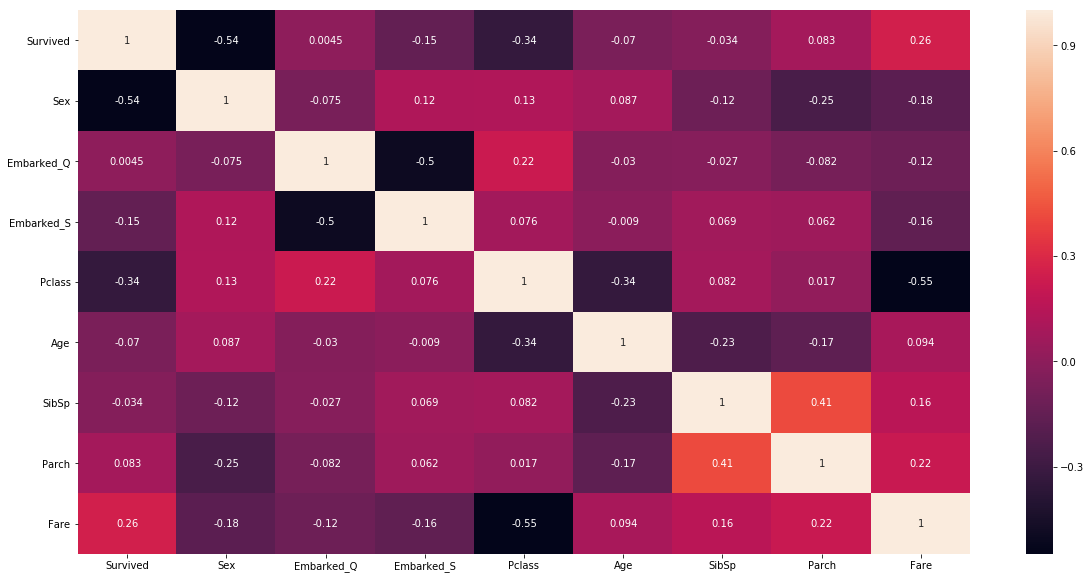

In [45]:
# Let's see the correlation matrix 

plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(trainData.corr(),annot = True)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
y_pred1 = model1.predict(X_test)
y_proba1 = model1.predict_proba(X_test)


In [48]:
from sklearn import metrics
cnf_matrix1 = metrics.confusion_matrix(y_test,y_pred1)

In [49]:
cnf_matrix1

array([[252,  13],
       [ 13, 139]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       265
           1       0.91      0.91      0.91       152

   micro avg       0.94      0.94      0.94       417
   macro avg       0.93      0.93      0.93       417
weighted avg       0.94      0.94      0.94       417



In [51]:
#Let's check the overall accuracy.
model1_Accuracy = metrics.accuracy_score( y_test, y_pred1)

In [52]:
model1_Accuracy

0.9376498800959233

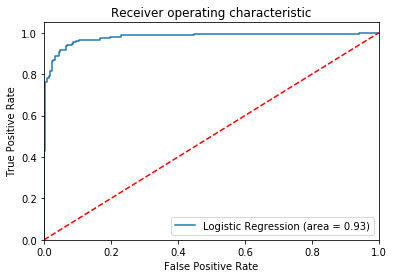

In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

#### Feature Selection using RFE 

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 7)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True False  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1]


C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
X_train.columns

Index(['Sex', 'Embarked_Q', 'Embarked_S', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [56]:
X_train2 = X_train.drop('Embarked_Q',1)

In [57]:
X_train2.head()

,Sex,Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,1,1,0.824744,-0.563357,0.431108,-0.474059,-0.499958
1,0,0,-1.571327,0.668840,0.431108,-0.474059,0.788503
2,0,1,0.824744,-0.255308,-0.474932,-0.474059,-0.486376
3,0,1,-1.571327,0.437803,0.431108,-0.474059,0.422623
4,1,1,0.824744,0.437803,-0.474932,-0.474059,-0.483861


In [58]:
X_test2 = X_test.drop('Embarked_Q',1)

#### Building our second model

In [59]:
# Logistic regression model
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.48
Date:                Sat, 28 Mar 2020   Deviance:                       784.96
Time:                        16:16:37   Pearson chi2:                     903.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3898      0.201      6.905      0.000       0.995       1.784
Sex           -2.7163      0.199    -13.628      0.000      -3.107      -2.326
Embarked_S    -0.3913      0.203     -1.932      0.053      -0.788       0.006
Pclass        -0.9214      0.117     -7.880      0.000      -1.151      -0.692
Age           -0.5117      0.102     -5.033      0.000      -0.711      -0.312
SibSp         -0.3579      0.120     -2.980      0.003      -0.593      -0.122
Parch         -0.0701      0.095     -0.737      0.461      -0.257       0.116
Fare           0.0975      0.118      0.828      0.408      -0.133       0.328
==============================================================================
"""

In [60]:
model2 = LogisticRegression()
model2.fit(X_train2, y_train)

C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
y_pred2 = model2.predict(X_test2)
y_proba2 = model2.predict_proba(X_test2)


In [62]:
cnf_matrix2 = metrics.confusion_matrix(y_test,y_pred2)

In [63]:
cnf_matrix2

array([[252,  13],
       [ 14, 138]], dtype=int64)

In [64]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       265
           1       0.91      0.91      0.91       152

   micro avg       0.94      0.94      0.94       417
   macro avg       0.93      0.93      0.93       417
weighted avg       0.94      0.94      0.94       417



In [65]:
#Let's check the overall accuracy.
model2_Accuracy = metrics.accuracy_score( y_test, y_pred2)
model2_Accuracy

0.935251798561151

#### Columns 'Parch' and 'Fare' still have a high P value , lets see if we should drop them .

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True False  True  True  True  True False False]
[1 4 1 1 1 1 3 2]


C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: F

In [67]:
X_train.columns

Index(['Sex', 'Embarked_Q', 'Embarked_S', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [68]:
columns = ['Embarked_Q','Parch']
X_train3 = X_train.drop(columns,1)
X_test3 = X_test.drop(columns,1)

In [69]:
X_train3.head()

,Sex,Embarked_S,Pclass,Age,SibSp,Fare
0,1,1,0.824744,-0.563357,0.431108,-0.499958
1,0,0,-1.571327,0.668840,0.431108,0.788503
2,0,1,0.824744,-0.255308,-0.474932,-0.486376
3,0,1,-1.571327,0.437803,0.431108,0.422623
4,1,1,0.824744,0.437803,-0.474932,-0.483861


#### Building our 3rd model 

In [70]:
# Logistic regression model
logm3 = sm.GLM(y_train,(sm.add_constant(X_train3)), family = sm.families.Binomial())
logm3.fit().summary()

C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.76
Date:                Sat, 28 Mar 2020   Deviance:                       785.51
Time:                        16:16:37   Pearson chi2:                     908.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3758      0.200      6.888      0.000       0.984       1.767
Sex           -2.6866      0.195    -13.802      0.000      -3.068      -2.305
Embarked_S    -0.4033      0.202     -2.000      0.045      -0.799      -0.008
Pclass        -0.9305      0.116     -8.018      0.000      -1.158      -0.703
Age           -0.5088      0.101     -5.016      0.000      -0.708      -0.310
SibSp         -0.3807      0.117     -3.267      0.001      -0.609      -0.152
Fare           0.0783      0.113      0.695      0.487      -0.143       0.299
==============================================================================
"""

In [71]:
model3 = LogisticRegression()
model3.fit(X_train3, y_train)

C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
y_pred3 = model3.predict(X_test3)
y_proba3 = model3.predict_proba(X_test3)


In [73]:
cnf_matrix3 = metrics.confusion_matrix(y_test,y_pred3)
cnf_matrix3

array([[252,  13],
       [ 12, 140]], dtype=int64)

In [74]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       265
           1       0.92      0.92      0.92       152

   micro avg       0.94      0.94      0.94       417
   macro avg       0.93      0.94      0.94       417
weighted avg       0.94      0.94      0.94       417



In [75]:
#Let's check the overall accuracy.
model3_Accuracy = metrics.accuracy_score( y_test, y_pred3)
model3_Accuracy

0.9400479616306955

#### lets drop the column 'Fare' which has a p value of 0.46 and try building our 4th and  final model

In [76]:
columns = ['Embarked_Q','Parch','Fare']
X_train4 = X_train.drop(columns,1)
X_test4 = X_test.drop(columns,1)

In [77]:
# Logistic regression model
logm4 = sm.GLM(y_train,(sm.add_constant(X_train4)), family = sm.families.Binomial())
logm4.fit().summary()

C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.01
Date:                Sat, 28 Mar 2020   Deviance:                       786.02
Time:                        16:16:37   Pearson chi2:                     910.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3933      0.198      7.028      0.000       1.005       1.782
Sex           -2.6936      0.194    -13.860      0.000      -3.074      -2.313
Embarked_S    -0.4291      0.198     -2.165      0.030      -0.818      -0.041
Pclass        -0.9714      0.101     -9.654      0.000      -1.169      -0.774
Age           -0.5123      0.101     -5.059      0.000      -0.711      -0.314
SibSp         -0.3639      0.114     -3.201      0.001      -0.587      -0.141
==============================================================================
"""

In [78]:
model4 = LogisticRegression()
model4.fit(X_train4, y_train)

C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kevin Chetti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
y_pred4 = model4.predict(X_test4)
y_proba4 = model4.predict_proba(X_test4)

In [80]:
cnf_matrix4 = metrics.confusion_matrix(y_test,y_pred4)
cnf_matrix4

array([[247,  18],
       [ 16, 136]], dtype=int64)

In [81]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       265
           1       0.88      0.89      0.89       152

   micro avg       0.92      0.92      0.92       417
   macro avg       0.91      0.91      0.91       417
weighted avg       0.92      0.92      0.92       417



In [82]:
#Let's check the overall accuracy.
model4_Accuracy = metrics.accuracy_score( y_test, y_pred4)
model4_Accuracy

0.9184652278177458

#### We notice that our accuracy has dropped after removing the column 'Fare'. Looks like the amount of Fare paid by customers did play an important role in their survival. Maybe the rich who could afford higher priced tickets had a higher survival rate.

### Model Evaluation

#### Plotting ROC Curves

In [83]:

y_proba_df1 = pd.DataFrame(y_proba1)
y_proba_array_1 = y_proba_df1.iloc[:,[1]]

y_proba_df2 = pd.DataFrame(y_proba2)
y_proba_array_2 = y_proba_df2.iloc[:,[1]]

y_proba_df3 = pd.DataFrame(y_proba3)
y_proba_array_3 = y_proba_df3.iloc[:,[1]]

y_proba_df4 = pd.DataFrame(y_proba4)
y_proba_array_4 = y_proba_df4.iloc[:,[1]]

In [84]:
y_proba_array_1.shape

(417, 1)

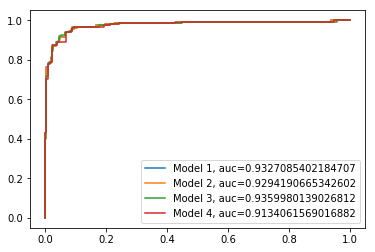

In [85]:
plt.figure(0).clf()


fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, y_proba_array_1)
auc1 = metrics.roc_auc_score(y_test, y_pred1)
plt.plot(fpr1,tpr1,label="Model 1, auc="+str(auc1))

fpr2, tpr2, thresh2 = metrics.roc_curve(y_test, y_proba_array_2)
auc2 = metrics.roc_auc_score(y_test, y_pred2)
plt.plot(fpr2,tpr2,label="Model 2, auc="+str(auc2))

fpr3, tpr3, thresh3 = metrics.roc_curve(y_test, y_proba_array_3)
auc3 = metrics.roc_auc_score(y_test, y_pred3)
plt.plot(fpr3,tpr3,label="Model 3, auc="+str(auc3))

fpr4, tpr4, thresh4 = metrics.roc_curve(y_test, y_proba_array_4)
auc4 = metrics.roc_auc_score(y_test, y_pred4)
plt.plot(fpr4,tpr4,label="Model 4, auc="+str(auc4))


plt.legend(loc=0)

#### Going by the above ROC and AUC graphs and the accuracies , we can see that model 3 performs slightly better than rest of the models.

### Finding Optimal Cutoff Point / Threshold Value 

In [86]:
FinalPredictions  = pd.DataFrame(y_proba_array_3)

In [87]:
FinalPredictions.head()

,1
0,0.105180
1,0.302560
2,0.104704
3,0.099326
4,0.537788


In [88]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    FinalPredictions[i]= FinalPredictions[1].map( lambda x: 1 if x > i else 0)


In [89]:
FinalPredictions['Actually_Survived'] = y_test['Survived']
FinalPredictions['Predicted_As_Survived'] = y_pred3

In [101]:
FinalPredictions.head()

,1.0,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Actually_Survived,Predicted_As_Survived
0,0.105180,1,1,0,0,0,0,0,0,0,0,0.0,0
1,0.302560,1,1,1,1,0,0,0,0,0,0,1.0,0
2,0.104704,1,1,0,0,0,0,0,0,0,0,0.0,0
3,0.099326,1,0,0,0,0,0,0,0,0,0,0.0,0
4,0.537788,1,1,1,1,1,1,0,0,0,0,1.0,1


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( FinalPredictions['Predicted_As_Survived'], FinalPredictions[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.366906  1.000000  0.000000
0.1   0.1  0.551559  1.000000  0.291667
0.2   0.2  0.784173  1.000000  0.659091
0.3   0.3  0.875300  1.000000  0.803030
0.4   0.4  0.940048  1.000000  0.905303
0.5   0.5  1.000000  1.000000  1.000000
0.6   0.6  0.923261  0.790850  1.000000
0.7   0.7  0.836930  0.555556  1.000000
0.8   0.8  0.769784  0.372549  1.000000
0.9   0.9  0.700240  0.183007  1.000000


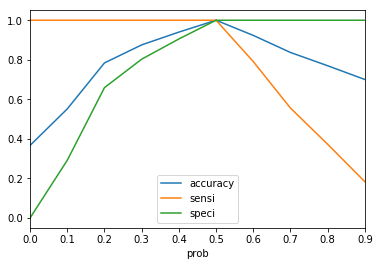

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability. Fortunately 0.5 is the default threshold value so we need not change the threshold value of the model.

In [97]:
model3_Accuracy

0.9400479616306955

In [100]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       265
           1       0.92      0.92      0.92       152

   micro avg       0.94      0.94      0.94       417
   macro avg       0.93      0.94      0.94       417
weighted avg       0.94      0.94      0.94       417

